In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [30]:
df = pd.read_csv("insurance.csv")

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [35]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

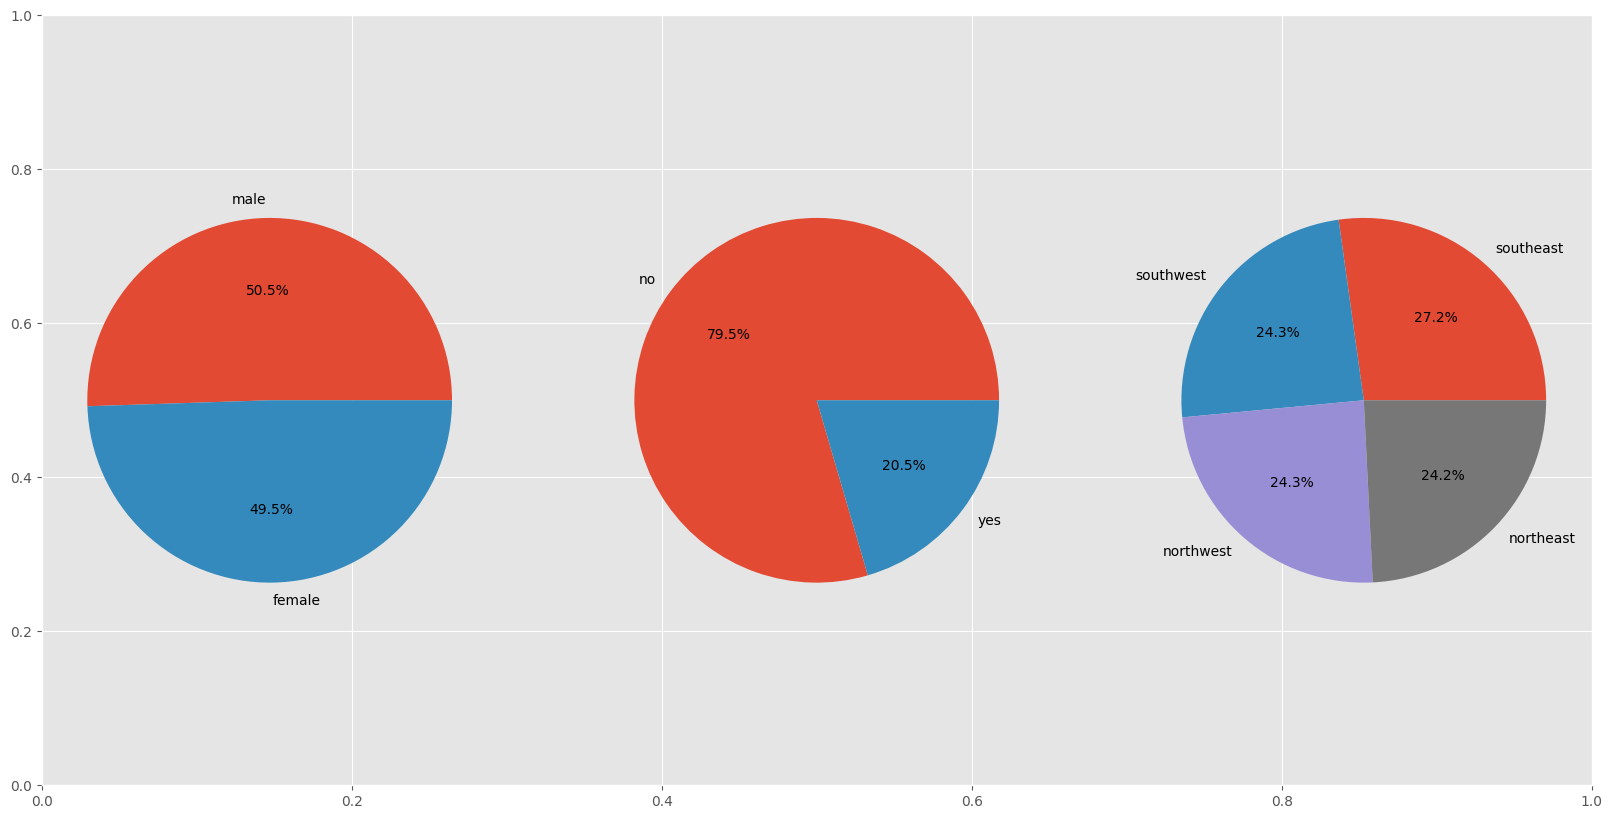

In [36]:
features = ['sex','smoker', 'region']
plt.subplots(figsize = (20,10))

for i , col in enumerate(features):
  plt.subplot(1,3,i+1)

  x = df[col].value_counts()
  plt.pie(x.values, labels=x.index, autopct= "%1.1f%%")

plt.show()

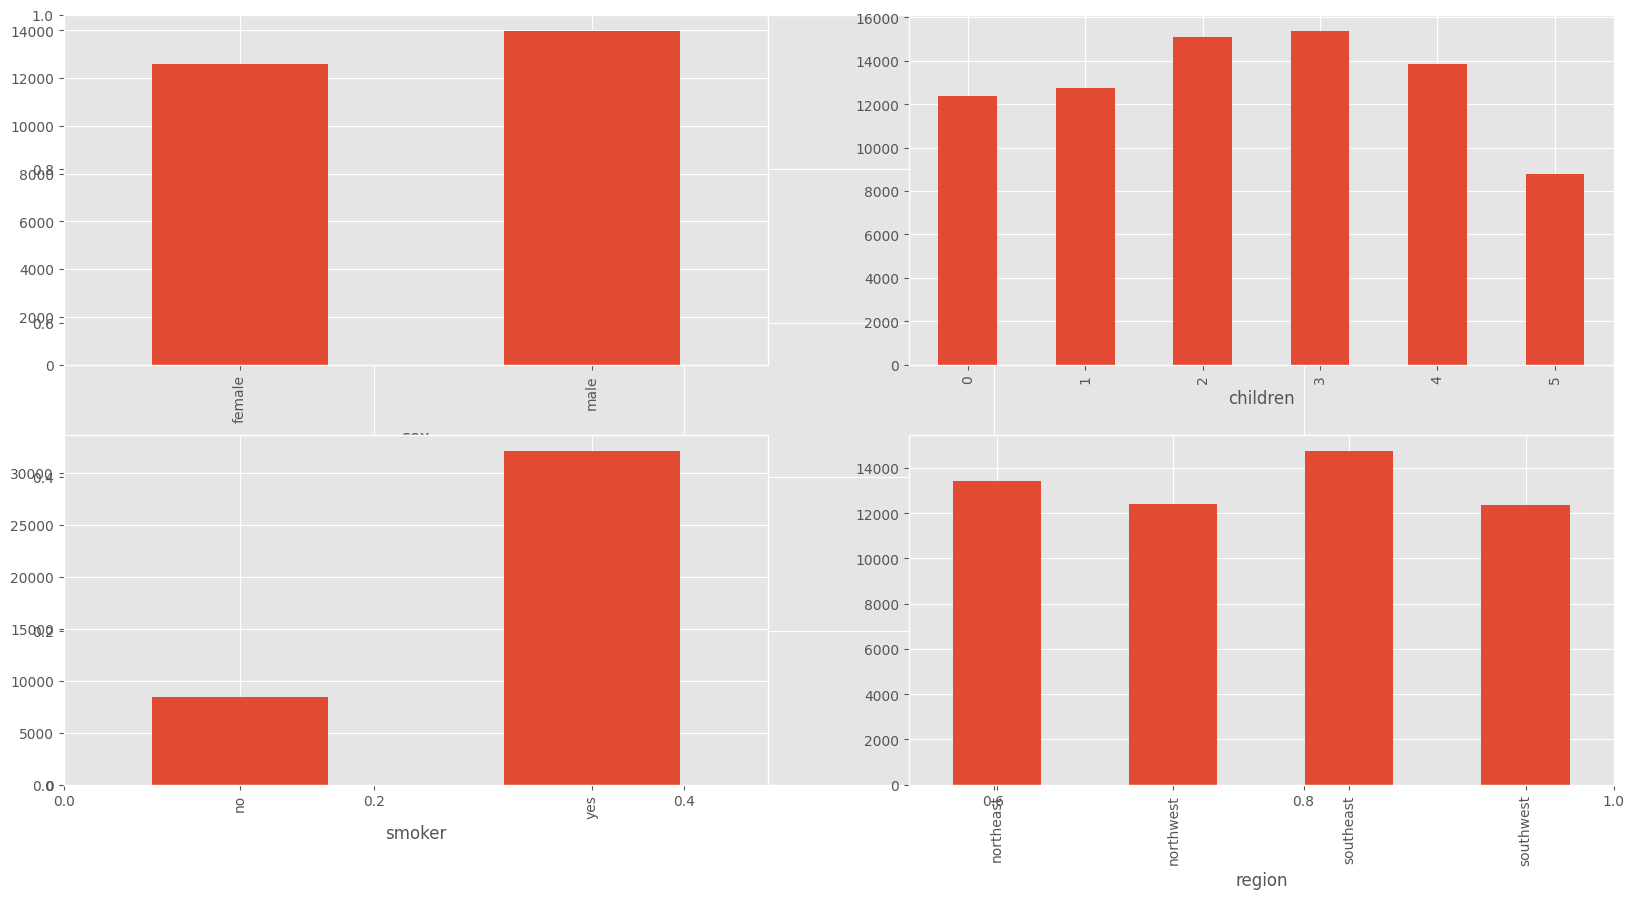

In [37]:
 features = ['sex', 'children', 'smoker', 'region' ]
 plt.subplots(figsize = (20,10))

 for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  df.groupby(col)['charges'].mean().astype(float).plot.bar()

plt.show()

In [38]:
import seaborn as sns

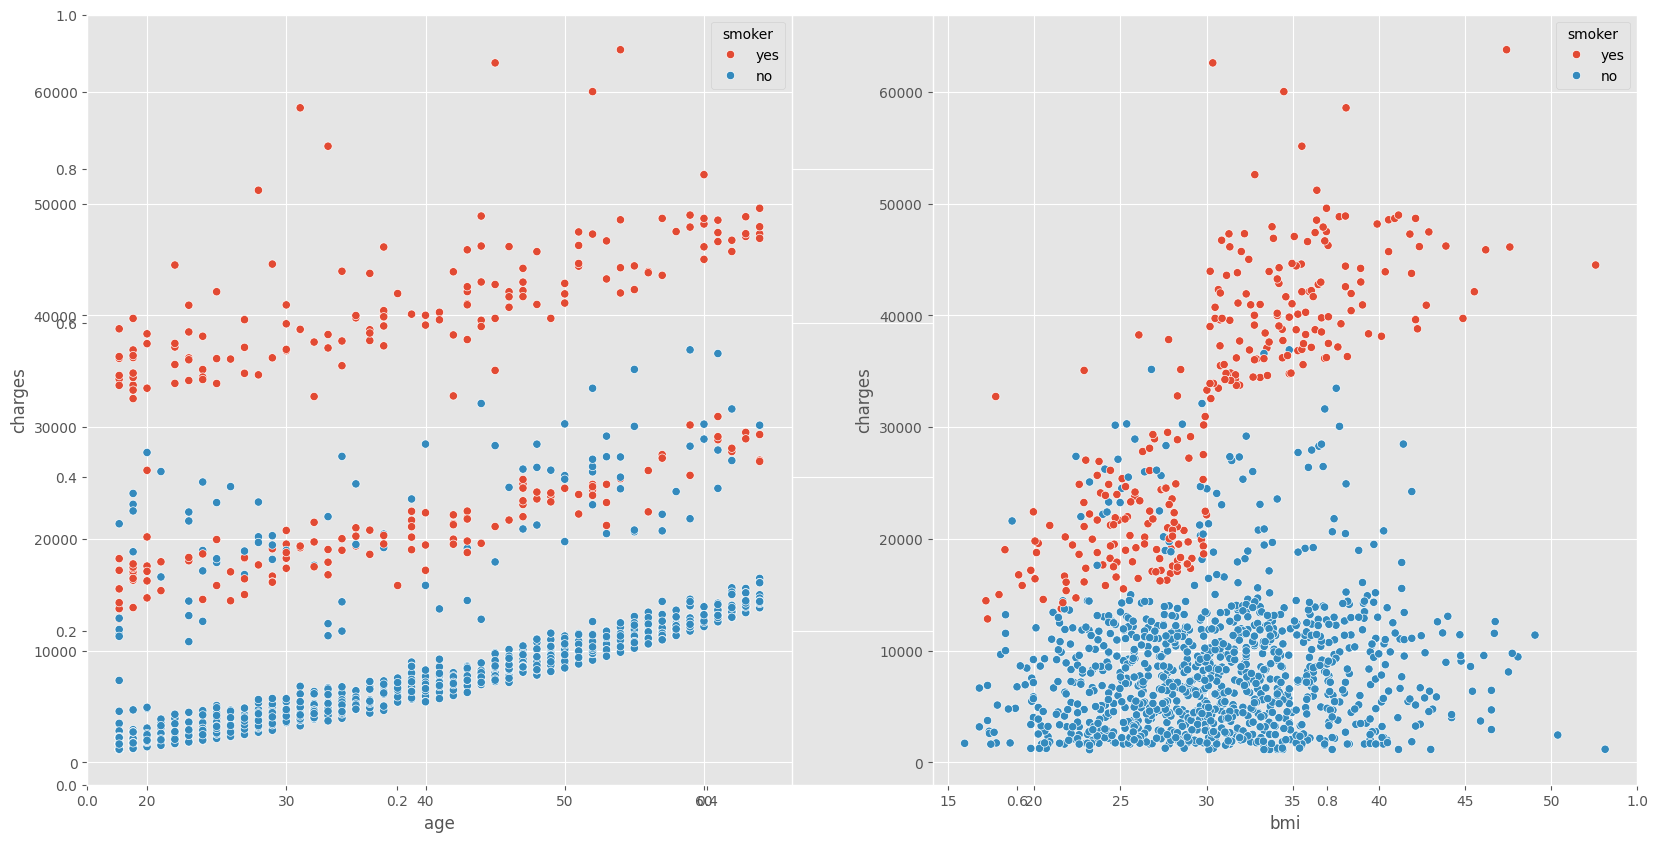

In [39]:
features = ['age', 'bmi']
plt.subplots(figsize = (20,10))

for i, col in enumerate(features):
  plt.subplot(1,2,i+1)
  sns.scatterplot(data = df , x= col, y= 'charges', hue='smoker')

plt.show()

In [40]:
df.drop_duplicates(inplace=True)

<Axes: ylabel='age'>

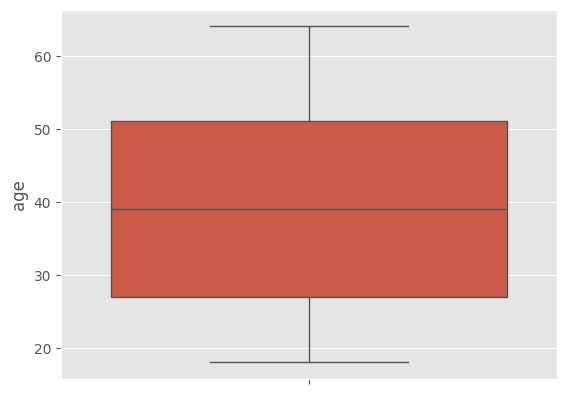

In [41]:
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

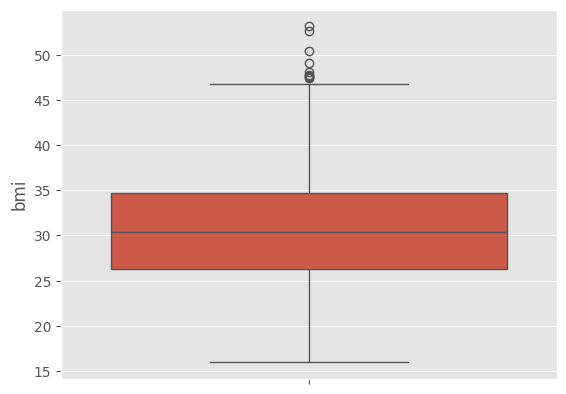

In [42]:
sns.boxplot(df['bmi'])

In [43]:
 Q1 = df['bmi'].quantile(0.25)
 Q2 = df['bmi'].quantile(0.50)
 Q3 = df['bmi'].quantile(0.75)

 IQR = Q3 - Q1
 lower_limit = Q1 - 1.5 * IQR
 upper_limit = Q3 +1.5 * IQR
 print(lower_limit)
 print(upper_limit)

13.674999999999994
47.31500000000001


In [44]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.


In [45]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb =  ArbitraryOutlierCapper(min_capping_dict={'bmi' :13.674999999999994 }, max_capping_dict ={'bmi' :47.290000000000006 }, )
df[['bmi']] =arb.fit_transform(df[['bmi']])

<Axes: ylabel='bmi'>

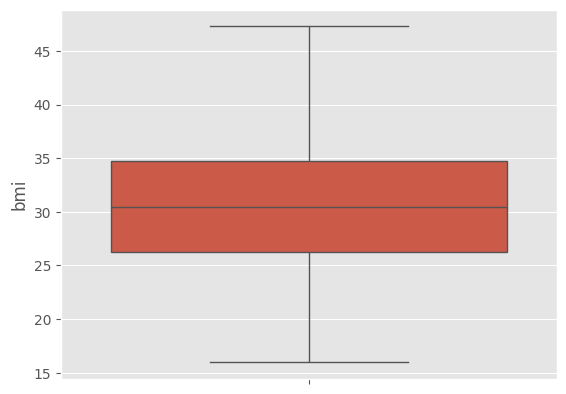

In [46]:
sns.boxplot(df['bmi'])


In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
df['bmi'].skew()
df['age'].skew()

0.054780773126998195

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [50]:
df['bmi'].skew()

0.2323976130084939

In [51]:
df['sex'] =df['sex'].map({'male':0 , 'female' :1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})


In [52]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [53]:
df['region'] = df ['region'].map({'northwest':0,'northeast':1, 'southwest':2, 'southeast':3 })

In [54]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.112006,0.041536,-0.025587,-0.006691,0.298308
sex,0.019814,1.000000,-0.044825,-0.017848,-0.076596,-0.017150,-0.058044
bmi,0.112006,-0.044825,1.000000,0.013697,0.003143,0.261146,0.199059
children,0.041536,-0.017848,0.013697,1.000000,0.007331,-0.020206,0.067389
smoker,-0.025587,-0.076596,0.003143,0.007331,1.000000,0.053454,0.787234
region,-0.006691,-0.017150,0.261146,-0.020206,0.053454,1.000000,0.056070
charges,0.298308,-0.058044,0.199059,0.067389,0.787234,0.056070,1.000000


In [55]:
 X = df.drop(['charges'],axis=1)
 y = df[['charges']]

In [56]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [57]:
l1 = []
l2 =[]
l3 =[]
cvs =0
for i in range(40, 50):
    X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state = i)
    lrmodel = LinearRegression()
    lrmodel.fit(X_train, y_train)
    l1.append(lrmodel.score(X_train,y_train))
    l2.append(lrmodel.score(X_test, y_test))
    cvs = (cross_val_score(lrmodel, X ,y, cv=5)).mean()
    l3.append(cvs)
    df1 = pd.DataFrame({'train_acc':l1,'test_acc':l2, 'cvs': l3})


In [58]:
df1

,train_acc,test_acc,cvs
0,0.741538,0.779140,0.747
1,0.756755,0.704263,0.747
2,0.729650,0.806355,0.747
3,0.753996,0.734116,0.747
4,0.742803,0.780841,0.747
5,0.753135,0.732737,0.747
6,0.741610,0.775973,0.747
7,0.732527,0.794686,0.747
8,0.751988,0.741913,0.747
9,0.756583,0.721870,0.747


In [59]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(X_train, y_train)
ypredtrain1 = svrmodel.predict(X_train)
ypredtest1 = svrmodel.predict(X_test)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
print(r2_score(y_train , ypredtrain1))
print(r2_score(y_test , ypredtest1))
print(cross_val_score(svrmodel, X , y ,cv=5).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.09789752905826998
-0.15287760656988358


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConve

-0.1037469314191803


In [61]:
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(X_train, y_train)
ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)
print(r2_score(y_train , ypredtrain2))
print(r2_score(y_test , ypredtest2))
print(cross_val_score(rfmodel, X , y ,cv=5).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9764592532534321
0.8515329500544169


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionW

0.8368493698669598


In [62]:
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [10,40,50,98,120,150]}
grid = GridSearchCV(estimator, param_grid, scoring= 'r2',cv =5)
grid.fit(X_train,y_train)
print(grid.best_params_)

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionW

{'n_estimators': 150}


In [63]:
RandomForestRegressor(random_state=42, n_estimators=150)

rfmodel.fit(X_train, y_train)
ypredtrain2 = rfmodel.predict(X_train)
ypredtest2 = rfmodel.predict(X_test)
print(r2_score(y_train , ypredtrain2))
print(r2_score(y_test , ypredtest2))
print(cross_val_score(rfmodel, X , y ,cv=5).mean())


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9764592532534321
0.8515329500544169


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1389: DataConversionW

0.8368493698669598


In [64]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(X_train,y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print(r2_score(y_train,ypredtrain3))
print(r2_score(y_test,ypredtest3))
print(cross_val_score(gbmodel,X,y,cv=5,).mean())

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\DELL\AppData\Local\Pro

{'learning_rate': 0.19, 'n_estimators': 20}
0.8793404121200078
0.8664428023664639
0.8606660830850504


c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Users\DELL\AppData\Local\Pro

In [65]:

xgmodel=XGBRegressor()
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

0.9947513341903687
0.7959930896759033
0.808076810836792


In [66]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(X_train,y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(xgmodel,X,y,cv=5,).mean())

{'gamma': 0, 'max_depth': 3, 'n_estimators': 10}
0.8811219930648804
0.8654167652130127
0.860581123828888


In [67]:
features_important = pd.DataFrame(data = grid.best_estimator_.feature_importances_, index = X.columns, columns = ['Importance'])

In [68]:
features_important

,Importance
age,0.038291
sex,0.003500
bmi,0.107480
children,0.011483
smoker,0.834993
region,0.004254


In [69]:

df.drop(df[['sex', 'region']], axis = 1, inplace=True)
Xf = df.drop(df[['charges']], axis =1)
X = df.drop(df[['charges']], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(Xf, y, test_size = 0.2, random_state = 42)

In [70]:
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(X_train,y_train)
ypredtrain4=finalmodel.predict(X_train)
ypredtest4=finalmodel.predict(X_test)
print(r2_score(y_train,ypredtrain4))
print(r2_score(y_test,ypredtest4))
print(cross_val_score(finalmodel,X,y,cv=5,).mean())

0.8691051602363586
0.9007425308227539
0.8606266975402832


In [71]:

import pickle
pickle.dump(finalmodel, open("model.pkl", "wb"))

In [72]:

new_data=pd.DataFrame({'age':19,'sex':'female','bmi':25.9,'children':3,'smoker':'no','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([6379.257], dtype=float32)